# Generating Trade Signals using Moving Average Crossover Strategy

In [23]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

## Simple Moving Average(SMA) Crossover strategy

In [24]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('META.csv')
meta_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800


> Note: The SMAs are calculated on closing prices and not adjusted close because we want the trade signal to be generated on the price data and not influenced by dividends paid.

In [25]:
# check for null values

meta_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
# shape of the dataframe

meta_df.shape

(503, 7)

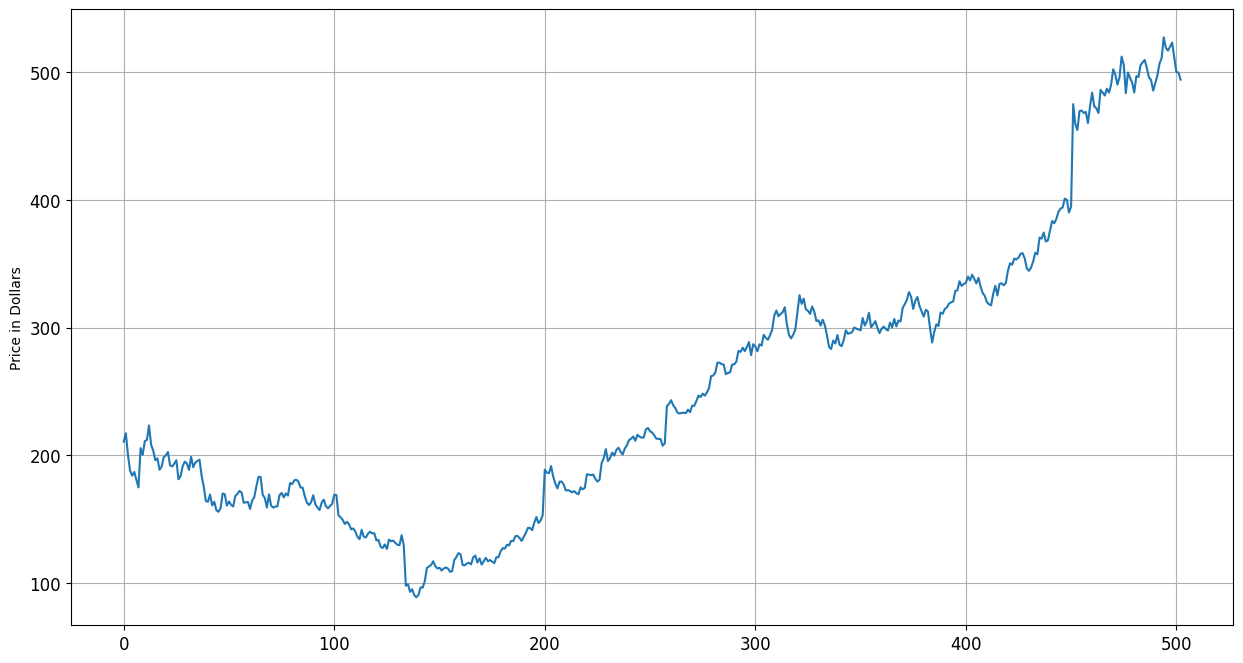

In [27]:
# observe general price variation of the closing price for the give period

#sns.set(style = 'whitegrid')
meta_df['Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.show()

In [28]:
# Create 20 days simple moving average column
meta_df['20_SMA'] = meta_df['Close'].rolling(window = 20, min_periods = 1).mean()

# Create 50 days simple moving average column
meta_df['50_SMA'] = meta_df['Close'].rolling(window = 50, min_periods = 1).mean()

meta_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800,210.770004,210.770004
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900,214.040001,214.040001
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500,209.500000,209.500000
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100,204.142502,204.142502
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800,200.136002,200.136002


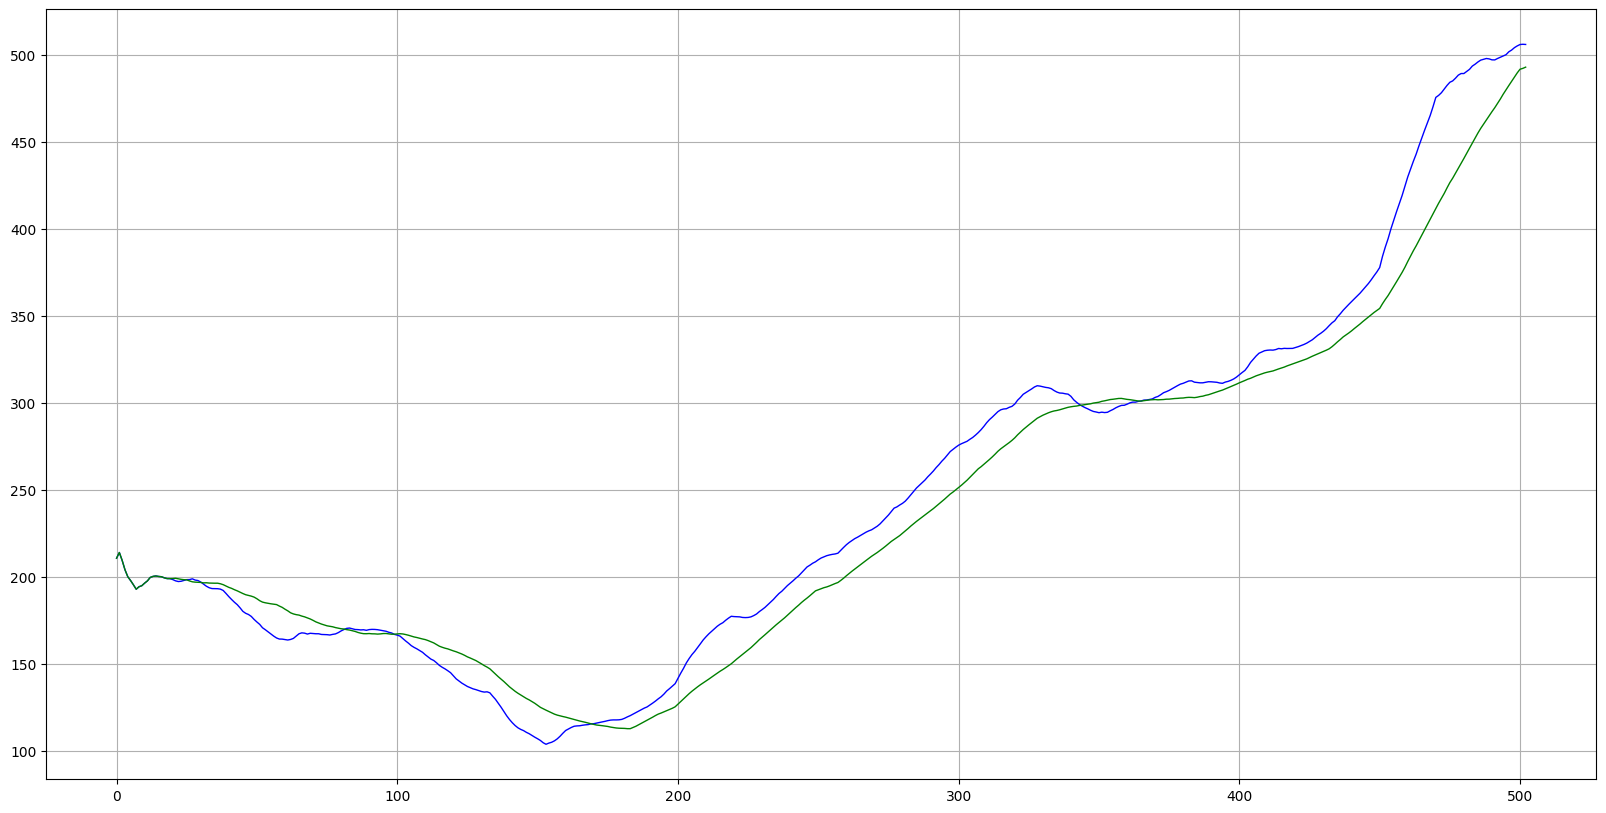

In [29]:
# plot short and long moving averages

plt.figure(figsize = (20, 10))
meta_df['20_SMA'].plot(color = 'b', lw = 1)
meta_df['50_SMA'].plot(color = 'g', lw = 1)
plt.grid()
plt.show()

In [30]:
# create a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal as 1 else 0.

meta_df['Signal'] = 0.0
meta_df['Signal'] = np.where(meta_df['20_SMA'] > meta_df['50_SMA'], 1.0, 0.0)

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column.
meta_df['Position'] = meta_df['Signal'].diff()

# display the dataframe
meta_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800,210.770004,210.770004,0.0,NaN
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900,214.040001,214.040001,0.0,0.0
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500,209.500000,209.500000,0.0,0.0
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100,204.142502,204.142502,0.0,0.0
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800,200.136002,200.136002,0.0,0.0
5,2022-04-25,182.729996,187.179993,181.660004,186.990005,186.791809,29281100,197.945002,197.945002,0.0,0.0
6,2022-04-26,186.630005,187.190002,179.500000,180.949997,180.758209,31747400,195.517144,195.517144,0.0,0.0
7,2022-04-27,174.429993,181.210007,169.000000,174.949997,174.764572,71062900,192.946251,192.946251,0.0,0.0
8,2022-04-28,202.919998,208.529999,192.899994,205.729996,205.511948,100890600,194.366667,194.366667,0.0,0.0
9,2022-04-29,204.460007,212.479996,199.899994,200.470001,200.257523,49193400,194.977000,194.977000,0.0,0.0


Note that Postion = 1 indicates a 'buy' call and Postition = -1 indicates 'sell' call

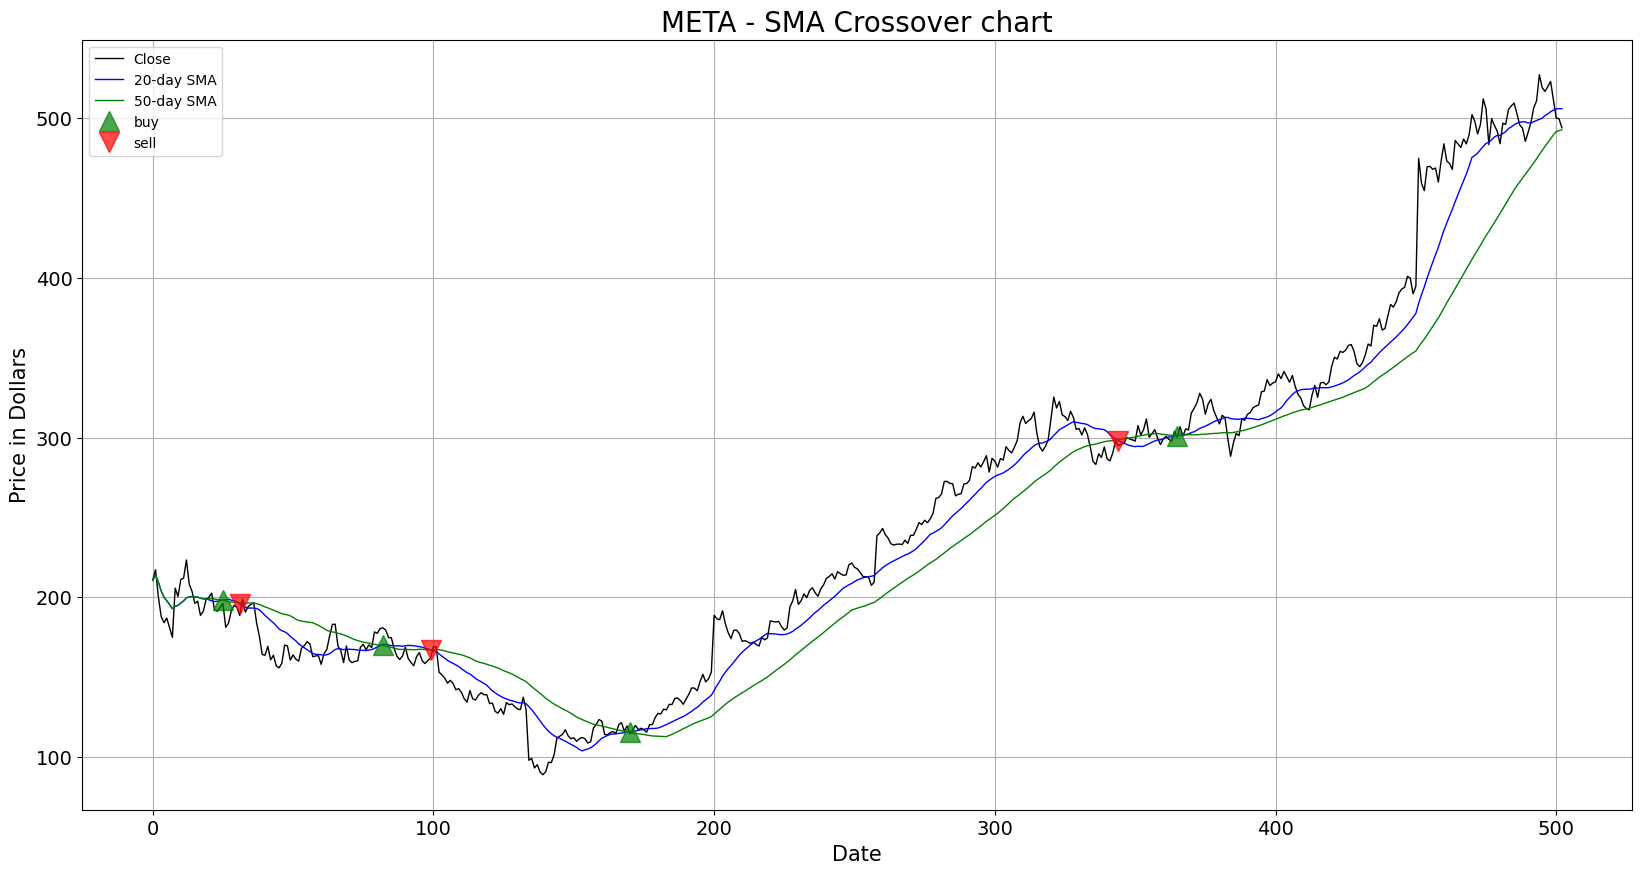

In [33]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages
meta_df['Close'].plot(color = 'k', lw = 1, label = 'Close')
meta_df['20_SMA'].plot(color = 'b', lw = 1, label = '20-day SMA')
meta_df['50_SMA'].plot(color = 'g', lw = 1, label = '50-day SMA')

# plot 'buy' signals
plt.plot(meta_df[meta_df['Position'] == 1].index,
         meta_df['20_SMA'][meta_df['Position'] == 1],
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(meta_df[meta_df['Position'] == -1].index,
         meta_df['20_SMA'][meta_df['Position'] == -1],
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('META - SMA Crossover chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## Exponential Moving Average(EMA) Crossover strategy

In [34]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('META.csv')
meta_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800


In [35]:
# Create 20 days exponential moving average column
meta_df['20_EMA'] = meta_df['Close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
meta_df['50_EMA'] = meta_df['Close'].ewm(span = 50, adjust = False).mean()

meta_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20_EMA,50_EMA
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800,210.770004,210.770004
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900,211.392861,211.026474
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500,210.347826,210.610534
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100,208.226129,209.726592
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800,205.929355,208.722020


In [36]:
# create a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal as 1 else 0.

meta_df['Signal'] = 0.0
meta_df['Signal'] = np.where(meta_df['20_EMA'] > meta_df['50_EMA'], 1.0, 0.0)

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column.
meta_df['Position'] = meta_df['Signal'].diff()

# display the dataframe
meta_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,20_EMA,50_EMA,Signal,Position
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800,210.770004,210.770004,0.0,NaN
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900,211.392861,211.026474,1.0,1.0
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500,210.347826,210.610534,0.0,-1.0
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100,208.226129,209.726592,0.0,0.0
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800,205.929355,208.722020,0.0,0.0
5,2022-04-25,182.729996,187.179993,181.660004,186.990005,186.791809,29281100,204.125607,207.869784,0.0,0.0
6,2022-04-26,186.630005,187.190002,179.500000,180.949997,180.758209,31747400,201.918406,206.814106,0.0,0.0
7,2022-04-27,174.429993,181.210007,169.000000,174.949997,174.764572,71062900,199.349986,205.564533,0.0,0.0
8,2022-04-28,202.919998,208.529999,192.899994,205.729996,205.511948,100890600,199.957606,205.571022,0.0,0.0
9,2022-04-29,204.460007,212.479996,199.899994,200.470001,200.257523,49193400,200.006406,205.370982,0.0,0.0


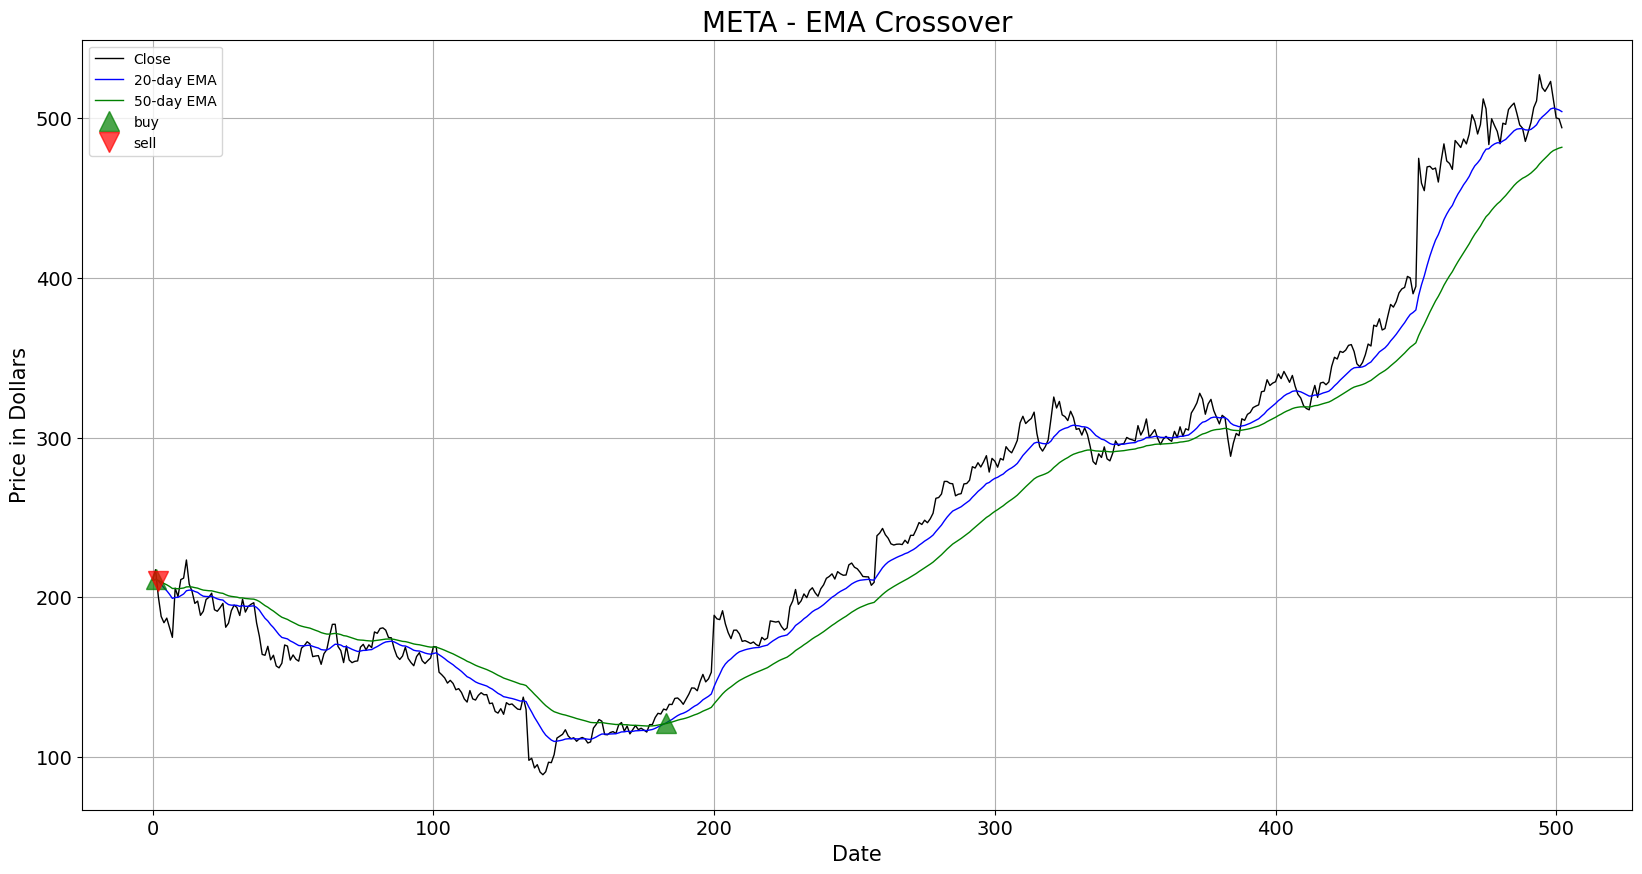

In [38]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages
meta_df['Close'].plot(color = 'k', lw = 1, label = 'Close')
meta_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA')
meta_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')

# plot 'buy' signals
plt.plot(meta_df[meta_df['Position'] == 1].index,
         meta_df['20_EMA'][meta_df['Position'] == 1],
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(meta_df[meta_df['Position'] == -1].index,
         meta_df['20_EMA'][meta_df['Position'] == -1],
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('META - EMA Crossover', fontsize = 20)
plt.legend();
plt.grid()
plt.show()

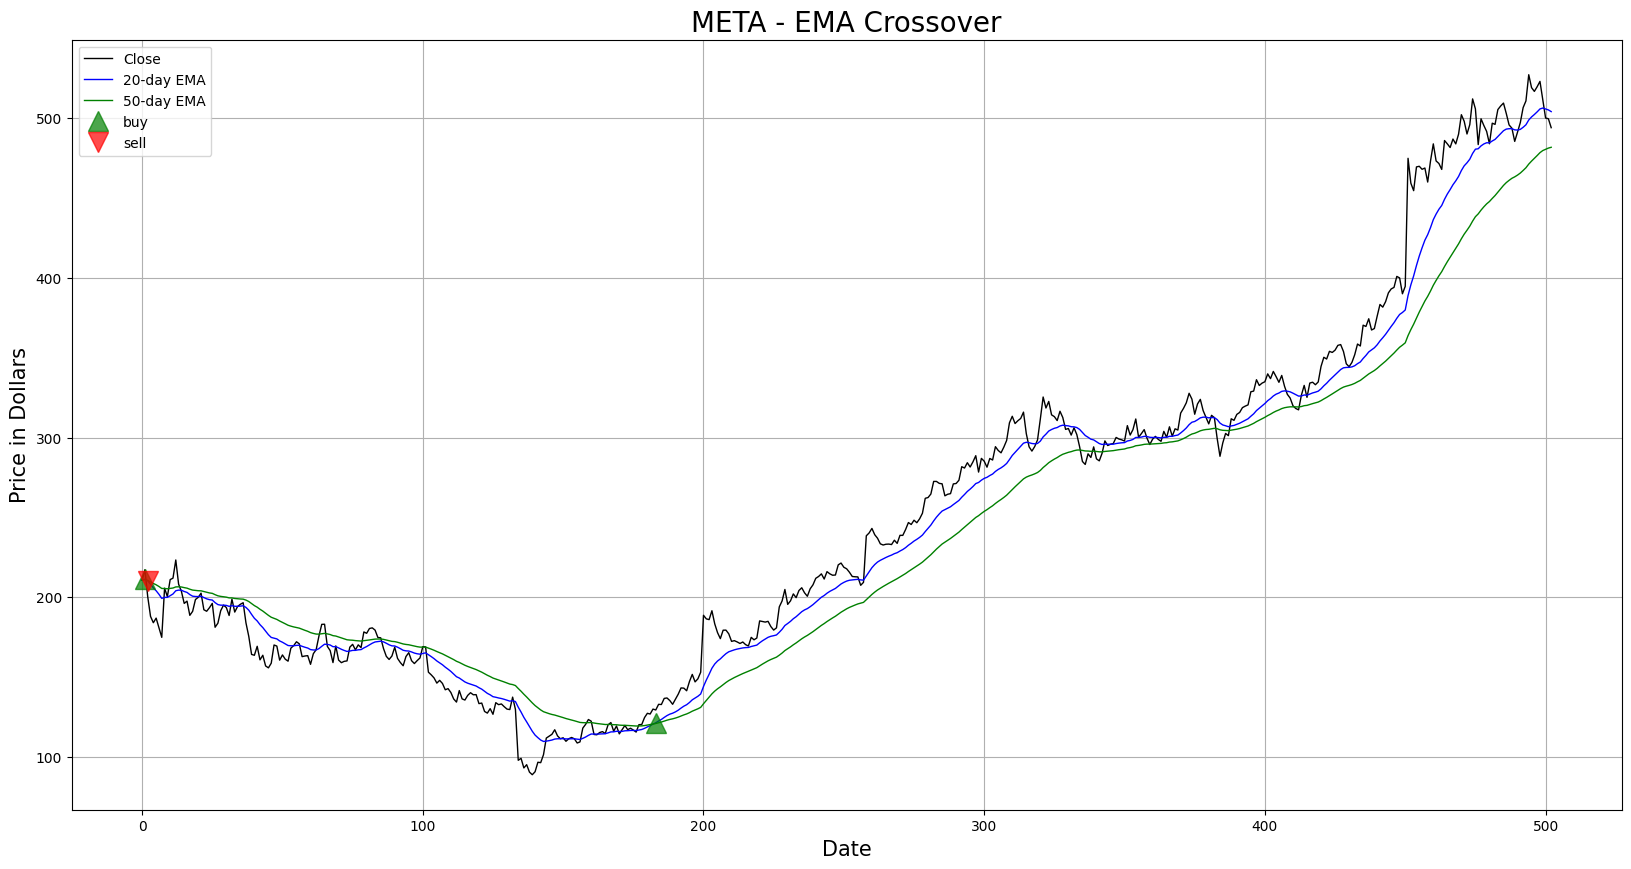

In [39]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('META.csv')

# Create 20 days exponential moving average column
meta_df['20_EMA'] = meta_df['Close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
meta_df['50_EMA'] = meta_df['Close'].ewm(span = 50, adjust = False).mean()

# create a new column 'Signal' such that if 20-day EMA is greater than 50-day SMA then set Signal as 1 else 0.
meta_df['Signal'] = 0.0
meta_df['Signal'] = np.where(meta_df['20_EMA'] > meta_df['50_EMA'], 1.0, 0.0)

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column.
meta_df['Position'] = meta_df['Signal'].diff()

plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
meta_df['Close'].plot(color = 'k', lw = 1, label = 'Close')
meta_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA')
meta_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')

# plot 'buy' signals
plt.plot(meta_df[meta_df['Position'] == 1].index,
         meta_df['20_EMA'][meta_df['Position'] == 1],
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(meta_df[meta_df['Position'] == -1].index,
         meta_df['20_EMA'][meta_df['Position'] == -1],
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('META - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [40]:
from tabulate import tabulate

df_new = meta_df[(meta_df['Position'] == 1) | (meta_df['Position'] == -1)]
df_new['Position'] = df_new['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_new, headers = 'keys', tablefmt = 'psql'))

+-----+------------+--------+--------+--------+---------+-------------+----------+----------+----------+----------+------------+
|     | Date       |   Open |   High |    Low |   Close |   Adj Close |   Volume |   20_EMA |   50_EMA |   Signal | Position   |
|-----+------------+--------+--------+--------+---------+-------------+----------+----------+----------+----------+------------|
|   1 | 2022-04-19 | 210.52 | 218.43 | 209    |  217.31 |     217.08  | 20089900 |  211.393 |  211.026 |        1 | Buy        |
|   2 | 2022-04-20 | 213.61 | 214.16 | 198.92 |  200.42 |     200.208 | 43036500 |  210.348 |  210.611 |        0 | Sell       |
| 183 | 2023-01-09 | 131.16 | 132.95 | 129.28 |  129.47 |     129.333 | 26649100 |  121.455 |  120.997 |        1 | Buy        |
+-----+------------+--------+--------+--------+---------+-------------+----------+----------+----------+----------+------------+
